# Volume 4: Optimal Control as Boundary Value Problems

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

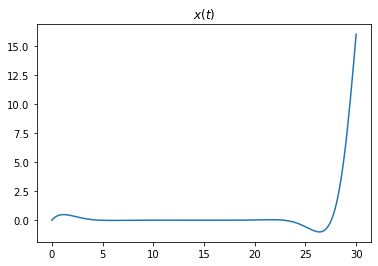

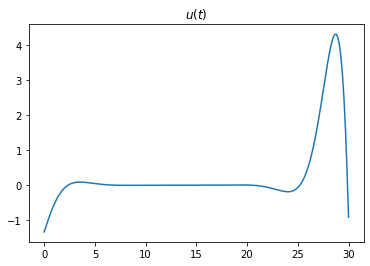

In [15]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    # ODE
    def ode(t, y):
        return np.array([y[1], 5*y[3]/(4*np.pi), 2*y[0], -y[2]])
    # Boundary condition
    def bc(a, b):
        return np.array([a[0], a[1]-1, b[0]-16, b[1]-10])
    
    t = np.linspace(0, 30, 200)
    y0 = np.ones((4, 200))
    sol = solve_bvp(ode, bc, t, y0)
    
    
    plt.plot(t, sol.y[0])
    plt.title(r"$x(t)$")
    plt.show()
    plt.plot(t, (5 / (4*np.pi)) * sol.y[3])
    plt.title(r"$u(t)$")
    plt.show()
prob1()

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [13]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

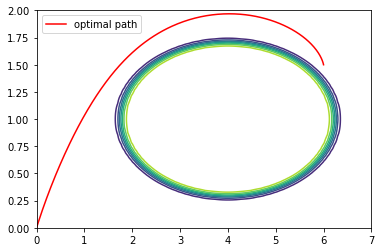

In [77]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    W1 = 16
    W2 = 5
    t = np.linspace(0, 20, 300)
    c = (4, 1)
    r = (5, .5)
    # obstacle(x,y,W1=1,r=(1,1),c=(0,0))
    # obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0))
    # obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0))
    
    # ODE
    def ode(t, y):
        return np.array([y[2],
                         y[3],
                         y[6]/(2*W2),
                         y[7]/(2*W2),
                         obstacle_dx(y[0], y[1], W1, r, c),
                         obstacle_dy(y[0], y[1], W1, r, c),
                         -y[4],
                         -y[5]])
    
    # Boundary condition
    def bc(a, b):
        return np.array([a[0] - 6,
                         a[1] - 1.5,
                         a[2],
                         a[3],
                         b[0],
                         b[1],
                         b[2],
                         b[3]])
    
    t = np.linspace(0, 20, 200)
    y0 = np.ones((8, 200))
    sol = solve_bvp(ode, bc, t, y0)
    plt.plot(sol.y[0], sol.y[1], label="optimal path", c="red")
    x = np.linspace(0, 7, 100)
    y = np.linspace(0, 2, 100)
    X, Y = np.meshgrid(x, y)
    oval = obstacle(X, Y, W1, r, c)
    plt.contour(X, Y, oval)
    plt.legend()
    plt.show()
prob2()

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

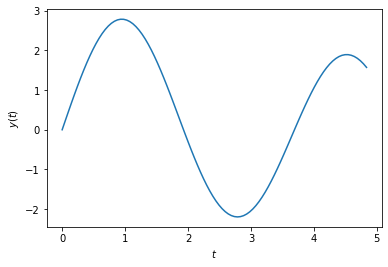

In [37]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    def ode(t,y,p):
        ''' define the ode system '''
        return p[0]*np.array([y[1], np.sin(p[0]*t) - 3*y[0]])
    
    def bc(ya,yb,p):
        ''' define the boundary conditions '''
        c = .5*np.sqrt(3)*np.pi/np.tan(np.pi*np.sqrt(75)) - .5
        return np.array([ya[0], yb[0] - np.pi/2, yb[1] - c])
    
    # give the time domain
    t_steps = 100
    t = np.linspace(0,1,t_steps)
    
    # give an initial guess
    y0 = np.ones((2,t_steps))
    p0 = np.array([6])
    
    # solve the system
    sol = solve_bvp(ode, bc, t, y0, p0)
    
    plt.plot(sol.p[0]*t,sol.sol(t)[0])
    plt.xlabel(r'$t$')
    plt.ylabel(r'$y(t)$')
    plt.show()

prob3()

## Problem 4
Refactor your code from problem 2 to create a free end time BVP and use a new boundary value derived from 14.14.
Plot the solution you found.
What is the optimal time?

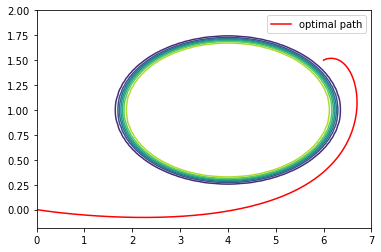

In [86]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution and return the optimal time.
    '''
    W1 = 16
    W2 = 9
    t = np.linspace(0, 20, 300)
    c = (4, 1)
    r = (5, .5)
    # obstacle(x,y,W1=1,r=(1,1),c=(0,0))
    # obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0))
    # obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0))
    
    # ODE
    def ode(t, y):
        return np.array([y[2],
                         y[3],
                         y[6]/(2*W2),
                         y[7]/(2*W2),
                         obstacle_dx(y[0], y[1], W1, r, c),
                         obstacle_dy(y[0], y[1], W1, r, c),
                         -y[4],
                         -y[5]])
    
    # Boundary condition
    def bc(a, b):
        return np.array([a[0] - 6,
                         a[1] - 1.5,
                         a[2],
                         a[3],
                         b[0],
                         b[1],
                         b[2],
                         b[3]])
    
    t = np.linspace(0, 20, 200)
    y0 = np.ones((8, 200))
    sol = solve_bvp(ode, bc, t, y0)
    plt.plot(sol.y[0], sol.y[1], label="optimal path", c="red")
    x = np.linspace(0, 7, 100)
    y = np.linspace(0, 2, 100)
    X, Y = np.meshgrid(x, y)
    oval = obstacle(X, Y, W1, r, c)
    plt.contour(X, Y, oval)
    plt.legend()
    plt.show()
prob4()